<center>
  <h1 style="
      background: linear-gradient(45deg, #4CAF50, #2196F3);
      color: #ffffff;
      font-size: 36px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 2px solid #2196F3;
      padding: 10px;
      border-radius: 8px;
      text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
      margin: 20px 0;
  ">Sentiment Analysis</h1>
</center>


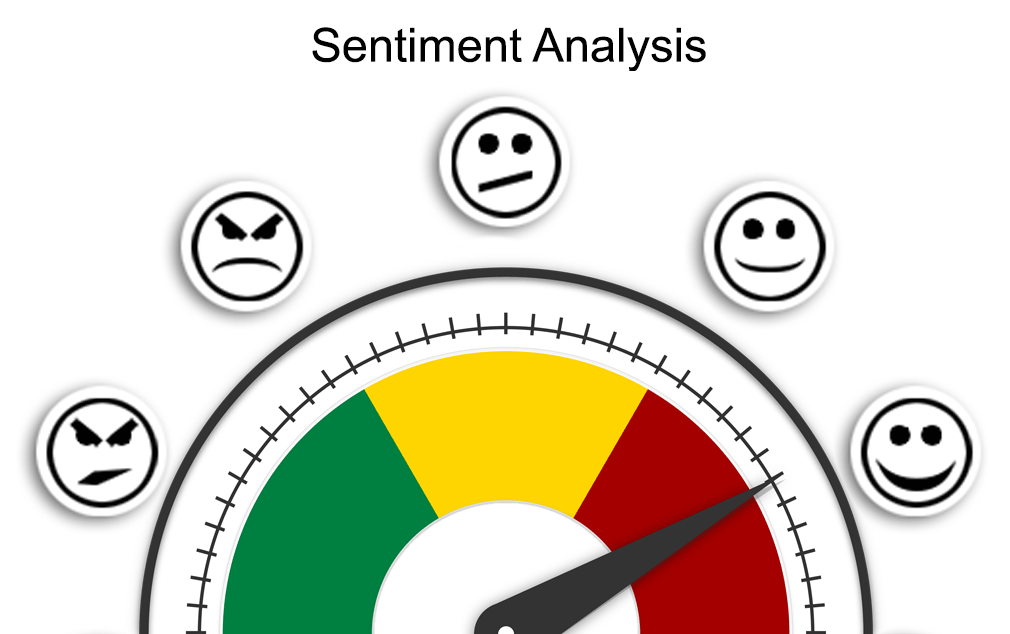

Sentiment analysis is the process of analyzing digital text to determine if the emotional tone of the message is positive or negative. Today, companies have large volumes of text data like emails, customer support chat transcripts, social media comments, and reviews. Sentiment analysis tools can scan this text to automatically determine the author’s attitude towards a topic. Companies use the insights from sentiment analysis to improve customer service and increase brand reputation. 


Why is sentiment analysis important?
Sentiment analysis, also known as opinion mining, is an important business intelligence tool that helps companies improve their products and services. We give some benefits of sentiment analysis below.

Provide objective insights
Businesses can avoid personal bias associated with human reviewers by using artificial intelligence (AI)–based sentiment analysis tools. As a result, companies get consistent and objective results when analyzing customers’ opinions.

For example, consider the following sentence: 

I'm amazed by the speed of the processor but disappointed that it heats up quickly. 

Marketers might dismiss the discouraging part of the review and be positively biased towards the processor's performance. However, accurate sentiment analysis tools sort and classify text to pick up emotions objectively.

Build better products and services
A sentiment analysis system helps companies improve their products and services based on genuine and specific customer feedback. AI technologies identify real-world objects or situations (called entities) that customers associate with negative sentiment. From the above example, product engineers focus on improving the processor's heat management capability because the text analysis software associated disappointed (negative) with processor (entity) and heats up (entity).

Analyze at scale
Businesses constantly mine information from a vast amount of unstructured data, such as emails, chatbot transcripts, surveys, customer relationship management records, and product feedback. Cloud-based sentiment analysis tools allow businesses to scale the process of uncovering customer emotions in textual data at an affordable cost. 

Real-time results
Businesses must be quick to respond to potential crises or market trends in today's fast-changing landscape. Marketers rely on sentiment analysis software to learn what customers feel about the company's brand, products, and services in real time and take immediate actions based on their findings. They can configure the software to send alerts when negative sentiments are detected for specific keywords.

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import nltk
import re
import tensorflow as tf
import keras
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

<h2 style="
      background: linear-gradient(45deg, #3498db, #2c3e50);
      color: #ffffff;
      font-size: 24px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 2px solid #2c3e50;
      padding: 8px;
      border-radius: 6px;
      text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);
      margin: 10px 0;
  ">Reading Dataset</h2>


In [2]:
files = glob.glob('../input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/*.txt')
files

['../input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/amazon_cells_labelled.txt',
 '../input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/imdb_labelled.txt',
 '../input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/readme.txt',
 '../input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/yelp_labelled.txt']

In [3]:
data=[]
for index in [0,1,3]: 
    f = open(files[0], "r")
    for review in f:
        x = review.strip().split('\t')
        data.append([x[0], int(x[1])])

data[0]

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 0]

In [4]:
data = pd.DataFrame(data,columns=['reviews','labels'])
data.head()

,reviews,labels
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [5]:
data.shape

(3000, 2)

In [6]:
data.describe()

,labels
count,3000.000000
mean,0.500000
std,0.500083
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [7]:
data['labels'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of labels
0    1500
1    1500
Name: count, dtype: int64>

<h2 style="
      background: linear-gradient(45deg, #3498db, #2c3e50);
      color: #ffffff;
      font-size: 24px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 2px solid #2c3e50;
      padding: 8px;
      border-radius: 6px;
      text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);
      margin: 10px 0;
  ">Preprocessing</h2>


In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
oov_tok = '<oov>'
embedding_dims = 16
padding_type = 'post'
vocab_size = 1000
max_length = 20
trunc_type = 'post'

In [10]:
ps = PorterStemmer()
corpus = []
sentances = data.reviews.copy()
for sent in sentances:
    review = re.sub('[^a-zA-Z]', ' ', sent).lower().split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [11]:
corpus[:10]

['way plug us unless go convert',
 'good case excel valu',
 'great jawbon',
 'tie charger convers last minut major problem',
 'mic great',
 'jiggl plug get line right get decent volum',
 'sever dozen sever hundr contact imagin fun send one one',
 'razr owner must',
 'needless say wast money',
 'wast money time']

In [12]:
onehot_representation = [one_hot(sent,vocab_size) for sent in corpus]
onehot_representation[:10]

[[888, 799, 29, 274, 915, 741],
 [837, 435, 618, 694],
 [279, 623],
 [445, 387, 818, 774, 264, 827, 793],
 [587, 279],
 [818, 799, 684, 781, 823, 684, 443, 77],
 [8, 31, 8, 678, 780, 93, 423, 313, 565, 565],
 [274, 478, 790],
 [184, 296, 20, 213],
 [20, 213, 526]]

In [13]:
padded_sequences = pad_sequences(onehot_representation,padding=padding_type,maxlen=max_length)

In [14]:
padded_sequences[:10]

array([[888, 799,  29, 274, 915, 741,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [837, 435, 618, 694,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [279, 623,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [445, 387, 818, 774, 264, 827, 793,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [587, 279,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [818, 799, 684, 781, 823, 684, 443,  77,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  8,  31,   8, 678, 780,  93, 423, 313, 565, 565,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [274, 478, 790,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [184, 296,  20, 213,   0,   0,   0,   0,   0,   0,   0,  

<h2 style="
      background: linear-gradient(45deg, #3498db, #2c3e50);
      color: #ffffff;
      font-size: 24px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 2px solid #2c3e50;
      padding: 8px;
      border-radius: 6px;
      text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);
      margin: 10px 0;
  ">Splitting Dataset</h2>


In [15]:
reviews = np.array(padded_sequences)
labels = np.array(data['labels'])

In [16]:
training_size = int(len(reviews)*0.80)
training_reviews = reviews[0:training_size]
testing_reviews = reviews[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [17]:
print('\n the first review:',training_reviews[0])
print('\n the sequence for the first review:',padded_sequences[0])



 the first review: [888 799  29 274 915 741   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]

 the sequence for the first review: [888 799  29 274 915 741   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]


<h2 style="
      background: linear-gradient(45deg, #3498db, #2c3e50);
      color: #ffffff;
      font-size: 24px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 2px solid #2c3e50;
      padding: 8px;
      border-radius: 6px;
      text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);
      margin: 10px 0;
  ">Embedding Model</h2>


In [18]:
embedding_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dims,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [19]:
embedding_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
embedding_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            16000     
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 16109 (62.93 KB)
Trainable params: 16109 (62.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
epochs_num =20
history=embedding_model.fit(training_reviews,training_labels_final,epochs=epochs_num,validation_data=(testing_reviews,testing_labels_final))

Epoch 1/20
75/75 [==============================] - 2s 7ms/step - loss: 0.6910 - accuracy: 0.5100 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 2/20
75/75 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.5658 - val_loss: 0.6730 - val_accuracy: 0.5633
Epoch 3/20
75/75 [==============================] - 0s 4ms/step - loss: 0.6537 - accuracy: 0.6254 - val_loss: 0.6442 - val_accuracy: 0.6383
Epoch 4/20
75/75 [==============================] - 0s 5ms/step - loss: 0.6126 - accuracy: 0.7013 - val_loss: 0.6037 - val_accuracy: 0.7333
Epoch 5/20
75/75 [==============================] - 0s 3ms/step - loss: 0.5649 - accuracy: 0.7667 - val_loss: 0.5605 - val_accuracy: 0.8200
Epoch 6/20
75/75 [==============================] - 0s 3ms/step - loss: 0.5133 - accuracy: 0.8400 - val_loss: 0.5170 - val_accuracy: 0.8217
Epoch 7/20
75/75 [==============================] - 0s 4ms/step - loss: 0.4671 - accuracy: 0.8700 - val_loss: 0.4781 - val_accuracy: 0.8683
Epoch 8/20
75/75 [==

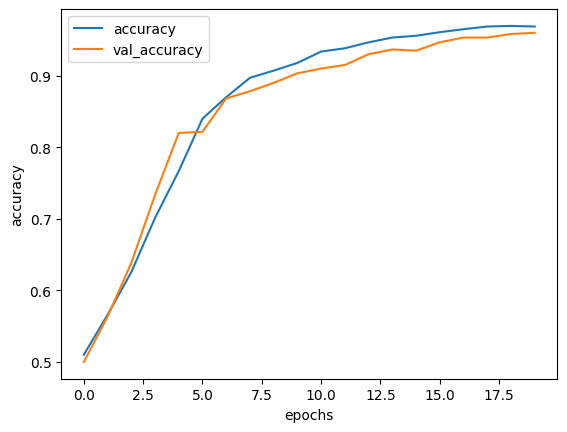

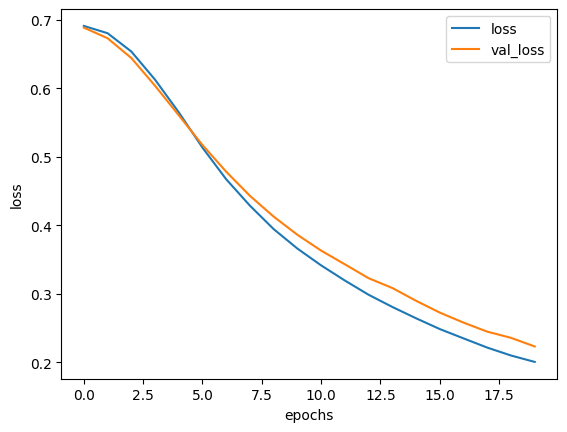

In [21]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()


plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

<h2 style="
      background: linear-gradient(45deg, #3498db, #2c3e50);
      color: #ffffff;
      font-size: 24px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 2px solid #2c3e50;
      padding: 8px;
      border-radius: 6px;
      text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);
      margin: 10px 0;
  ">Predicting Sentiment in New Reviews For Embedding Model</h2>


In [22]:
new_reviews_to_predict = [
    "Worst purchase ever. Do not buy!",
    "Great value for the price.",
    "Terrible quality, very disappointed."
]

In [23]:
tokenizer = Tokenizer()
def predict_sentiment(model, tokenizer, new_reviews, max_length=max_length, show_padded_sequence=True):
    corpus=[]
    for sent in new_reviews:
        review = re.sub('[^a-zA-Z]', ' ', sent).lower().split()
        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)
        
    onehot_representation = [one_hot(sent,vocab_size) for sent in corpus]   
    padded_sequences = pad_sequences(onehot_representation,padding=padding_type,maxlen=max_length)
    
    classes = model.predict(padded_sequences)

    for i in range(len(new_reviews)):
        if show_padded_sequence:
            print(f"Padded Sequence: {padded_sequences[i]}")
        print(f"Review: {new_reviews[i]}")
        print(f"Predicted Probability: {classes[i][0]}")
       
        threshold = 0.5
        if classes[i][0] >= threshold:
            print("Prediction: Positive Sentiment")
        else:
            print("Prediction: Negative Sentiment")
        print("\n")


predict_sentiment(embedding_model, tokenizer, new_reviews_to_predict)


1/1 [==============================] - 0s 110ms/step
Padded Sequence: [306 144  74 791   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
Review: Worst purchase ever. Do not buy!
Predicted Probability: 0.23019035160541534
Prediction: Negative Sentiment


Padded Sequence: [279 694 958   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
Review: Great value for the price.
Predicted Probability: 0.9986048340797424
Prediction: Positive Sentiment


Padded Sequence: [834 120 587   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
Review: Terrible quality, very disappointed.
Predicted Probability: 0.23019035160541534
Prediction: Negative Sentiment




<h2 style="
      background: linear-gradient(45deg, #3498db, #2c3e50);
      color: #ffffff;
      font-size: 24px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 2px solid #2c3e50;
      padding: 8px;
      border-radius: 6px;
      text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);
      margin: 10px 0;
  "> LSTM Model</h2>


In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dims,input_length=max_length),
    tf.keras.layers.LSTM(embedding_dims,return_sequences=True,kernel_regularizer= keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(embedding_dims),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),

])

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 16)            16000     
                                                                 
 lstm (LSTM)                 (None, 20, 16)            2112      
                                                                 
 dropout (Dropout)           (None, 20, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                

In [26]:
history1=model.fit(training_reviews,training_labels_final,epochs=20,validation_data=(testing_reviews,testing_labels_final))

Epoch 1/20
75/75 [==============================] - 7s 32ms/step - loss: 0.8776 - accuracy: 0.4954 - val_loss: 0.8078 - val_accuracy: 0.4817
Epoch 2/20
75/75 [==============================] - 1s 19ms/step - loss: 0.7544 - accuracy: 0.5692 - val_loss: 0.5445 - val_accuracy: 0.8350
Epoch 3/20
75/75 [==============================] - 1s 19ms/step - loss: 0.3776 - accuracy: 0.8721 - val_loss: 0.2792 - val_accuracy: 0.9100
Epoch 4/20
75/75 [==============================] - 2s 20ms/step - loss: 0.2000 - accuracy: 0.9429 - val_loss: 0.1726 - val_accuracy: 0.9467
Epoch 5/20
75/75 [==============================] - 1s 20ms/step - loss: 0.1288 - accuracy: 0.9650 - val_loss: 0.1718 - val_accuracy: 0.9467
Epoch 6/20
75/75 [==============================] - 1s 20ms/step - loss: 0.0984 - accuracy: 0.9750 - val_loss: 0.1303 - val_accuracy: 0.9600
Epoch 7/20
75/75 [==============================] - 1s 20ms/step - loss: 0.0680 - accuracy: 0.9837 - val_loss: 0.0751 - val_accuracy: 0.9850
Epoch 8/20
75

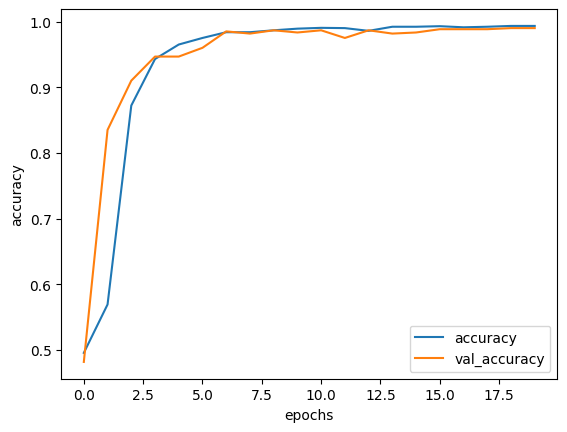

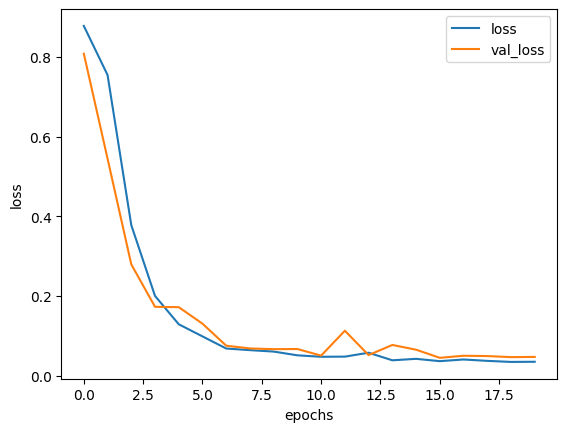

In [27]:
plot_graphs(history1,'accuracy')
plot_graphs(history1,'loss')

<h2 style="
      background: linear-gradient(45deg, #3498db, #2c3e50);
      color: #ffffff;
      font-size: 24px;
      font-weight: bold;
      font-family: 'Arial', sans-serif;
      border: 2px solid #2c3e50;
      padding: 8px;
      border-radius: 6px;
      text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);
      margin: 10px 0;
  ">Predicting Sentiment in New Reviews For LSTM Model</h2>


In [28]:
predict_sentiment(model, tokenizer, new_reviews_to_predict)

1/1 [==============================] - 1s 896ms/step
Padded Sequence: [306 144  74 791   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
Review: Worst purchase ever. Do not buy!
Predicted Probability: 0.001081920345313847
Prediction: Negative Sentiment


Padded Sequence: [279 694 958   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
Review: Great value for the price.
Predicted Probability: 0.9989468455314636
Prediction: Positive Sentiment


Padded Sequence: [834 120 587   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
Review: Terrible quality, very disappointed.
Predicted Probability: 0.0011289675021544099
Prediction: Negative Sentiment


